In [1]:

!python -m pip install --upgrade pip

  Found existing installation: pip 9.0.3
    Uninstalling pip-9.0.3:
      Successfully uninstalled pip-9.0.3


In [3]:

!pip install ipykernel --upgrade

Requirement not upgraded as not directly required: tornado>=4.0 in c:\users\dev\anaconda3\lib\site-packages (from ipykernel) (4.5.3)
Requirement not upgraded as not directly required: traitlets>=4.1.0 in c:\users\dev\anaconda3\lib\site-packages (from ipykernel) (4.3.2)
Requirement not upgraded as not directly required: jupyter-client in c:\users\dev\anaconda3\lib\site-packages (from ipykernel) (5.2.2)
Requirement not upgraded as not directly required: ipython>=4.0.0 in c:\users\dev\anaconda3\lib\site-packages (from ipykernel) (6.2.1)
Requirement not upgraded as not directly required: ipython_genutils in c:\users\dev\anaconda3\lib\site-packages (from traitlets>=4.1.0->ipykernel) (0.2.0)
Requirement not upgraded as not directly required: six in c:\users\dev\anaconda3\lib\site-packages (from traitlets>=4.1.0->ipykernel) (1.11.0)
Requirement not upgraded as not directly required: decorator in c:\users\dev\anaconda3\lib\site-packages (from traitlets>=4.1.0->ipykernel) (4.2.1)
Requirement no

In [4]:

!pip install networkx --upgrade

Requirement already up-to-date: networkx in c:\users\dev\anaconda3\lib\site-packages (2.1)
Requirement not upgraded as not directly required: decorator>=4.1.0 in c:\users\dev\anaconda3\lib\site-packages (from networkx) (4.2.1)


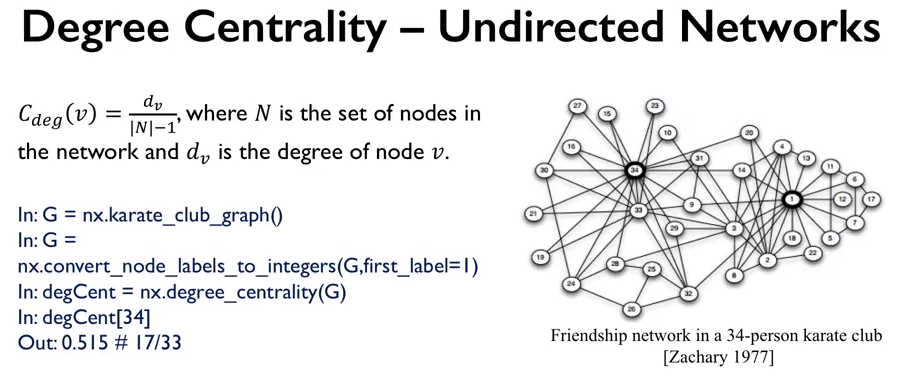

In [5]:

from IPython.display import Image

Image('../../saves/png/degree_centrality_undirected_networks.png')

In [6]:

import networkx as nx

karate_club_graph = nx.karate_club_graph()
karate_club_graph = nx.convert_node_labels_to_integers(karate_club_graph, first_label=1)

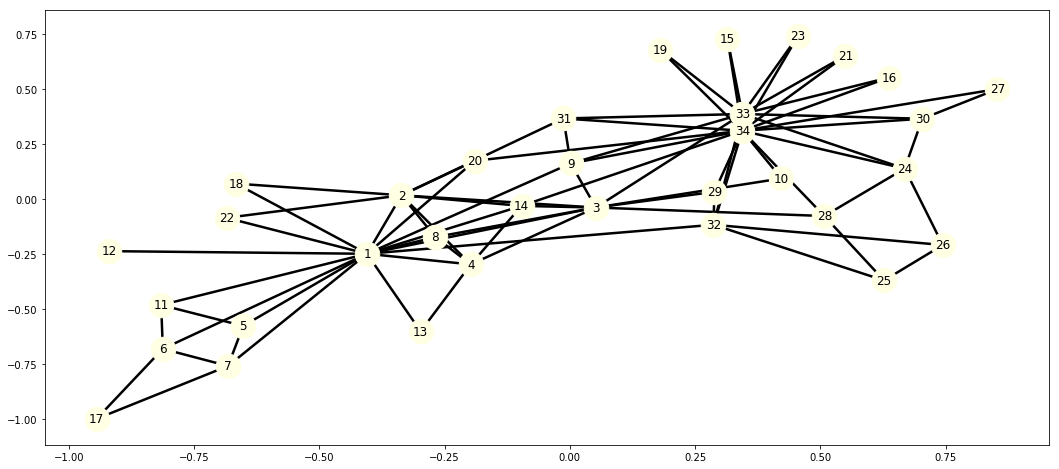

In [7]:

import matplotlib.pyplot as plt
%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(karate_club_graph, node_color='xkcd:off white',
                 width=2.5, node_size=600)

In [8]:

degree_centrality = nx.degree_centrality(karate_club_graph)
print(degree_centrality[34])
print(degree_centrality[33])

0.5151515151515151
0.36363636363636365


In [9]:

disconnected_dipraph = nx.DiGraph()
disconnected_dipraph.add_nodes_from([chr(i) for i in range(65, 80)])
disconnected_dipraph.add_edges_from([('A', 'B'), ('A', 'E'), ('A', 'N'), ('B', 'C'), ('B', 'E'),
                                     ('C', 'A'), ('C', 'D'), ('D', 'B'), ('D', 'E'),
                                     ('E', 'C'), ('E', 'D'), ('F', 'G'), ('G', 'A'), ('G', 'J'),
                                     ('H', 'G'), ('H', 'I'), ('I', 'F'), ('I', 'G'), ('I', 'H'), ('I', 'J'),
                                     ('J', 'F'), ('J', 'O'), ('K', 'L'), ('K', 'M'), ('L', 'M'),
                                     ('N', 'L'), ('N', 'O'), ('O', 'J'), ('O', 'K'), ('O', 'L')])

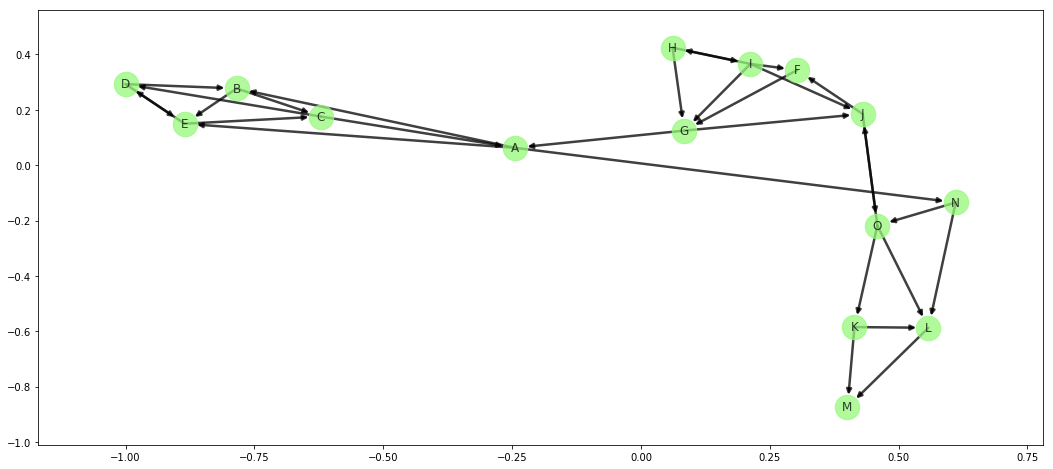

In [10]:

import matplotlib.pyplot as plt
%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(disconnected_dipraph, node_color='xkcd:light green',
                 alpha=.75, width=2.5, node_size=600)

In [11]:

# The degree centrality for a node v is the fraction of nodes it
# is connected to
degree_centrality = nx.degree_centrality(disconnected_dipraph)

# The in-degree centrality for a node v is the fraction of nodes its
# incoming edges are connected to
in_degree_centrality = nx.in_degree_centrality(disconnected_dipraph)
print(in_degree_centrality['A'])
print(in_degree_centrality['L'])

# The out-degree centrality for a node v is the fraction of nodes its
# outgoing edges are connected to
out_degree_centrality = nx.out_degree_centrality(disconnected_dipraph)
print(out_degree_centrality['A'])
print(out_degree_centrality['L'])

0.14285714285714285
0.21428571428571427
0.21428571428571427
0.07142857142857142


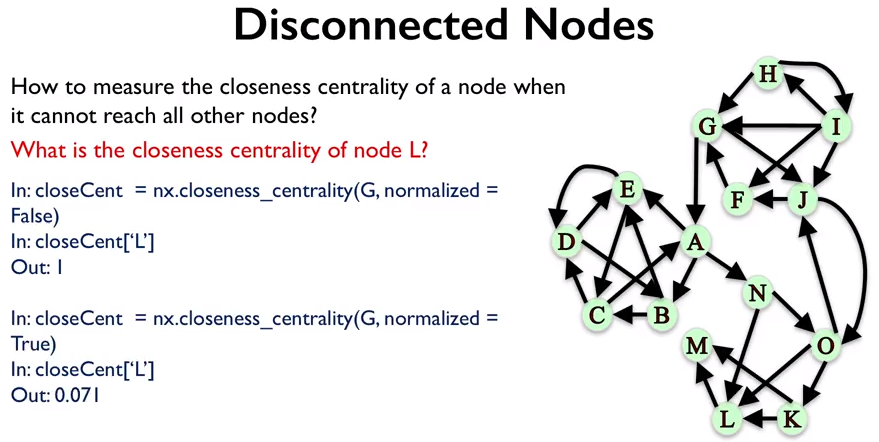

In [12]:

from IPython.display import Image

Image('../../saves/png/disconnect_nodes.png')

In [15]:

# Closeness centrality of node L is the reciprocal of the
# average shortest path distance to L over all n-1 reachable nodes
print('{:.3} = ({}-1)/{} = {:.3}'.format(nx.closeness_centrality(karate_club_graph, u=32, wf_improved=False),
                                 len(karate_club_graph.nodes()),
                                 sum(nx.shortest_path_length(karate_club_graph, source=32).values()),
                                 (len(karate_club_graph.nodes())-1)/sum(nx.shortest_path_length(karate_club_graph,
                                                                                                source=32).values())))

0.541 = (34-1)/61 = 0.541


In [16]:

# Closeness centrality of node L is the reciprocal of the
# average shortest path distance to L over all n-1 reachable nodes
nx.closeness_centrality(disconnected_dipraph, u='L', wf_improved=False, reverse=True)

1.0

In [17]:

# Wasserman and Faust propose an improved formula for graphs with
# more than one connected component. The result is "a ratio of the
# fraction of actors in the group who are reachable, to the average
# distance" from the reachable actor
nx.closeness_centrality(disconnected_dipraph, u='L', wf_improved=True, reverse=True)

0.07142857142857142


Which node has the highest closeness centrality under option 1, where we only consider the distance to reachable nodes? _Note: the closeness centrality of nodes that cannot reach any other nodes is always zero._

In [19]:

import numpy as np

disconnected_dipraph = nx.DiGraph()
node_list = [chr(i) for i in range(65, 69)]
disconnected_dipraph.add_nodes_from(node_list)
disconnected_dipraph.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D')])

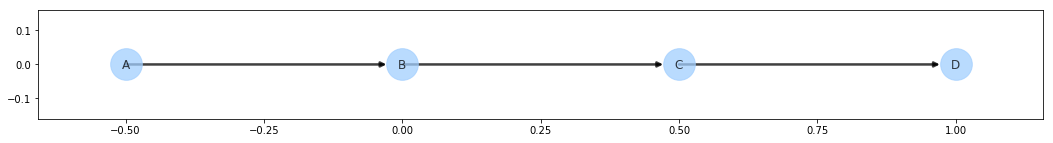

In [20]:

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 2))
pos = {'A': np.array([-0.5, 0]),
       'B': np.array([0, 0]),
       'C': np.array([0.5, 0]),
       'D': np.array([1, 0])}
nx.draw_networkx(disconnected_dipraph, pos, node_color='xkcd:baby blue',
                 alpha=.75, width=2.5, node_size=1000)

In [21]:

for node in node_list:
    print(node, nx.closeness_centrality(disconnected_dipraph, u=node, wf_improved=False, reverse=True))

A 0.5
B 0.6666666666666666
C 1.0
D 0.0



Which node has the highest closeness centrality under option 2, where we normalize by the fraction of nodes a node can reach? _Note: the closeness centrality of nodes that cannot reach any other nodes is always zero._

In [22]:

for node in node_list:
    print(node, nx.closeness_centrality(disconnected_dipraph, u=node, wf_improved=True, reverse=True))

A 0.5
B 0.4444444444444444
C 0.3333333333333333
D 0.0



Given the following network, which node has the highest betweenness (excluding endpoints)? What’s the betweenness score (excluding endpoints) of this node? _Give your answer in the following format: X, #_

In [23]:

betweenness_graph = nx.Graph()
node_list = [chr(i) for i in range(65, 72)]
betweenness_graph.add_nodes_from(node_list)
betweenness_graph.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D'),
                                  ('D', 'E'), ('E', 'F'), ('E', 'G'), ('F', 'G')])

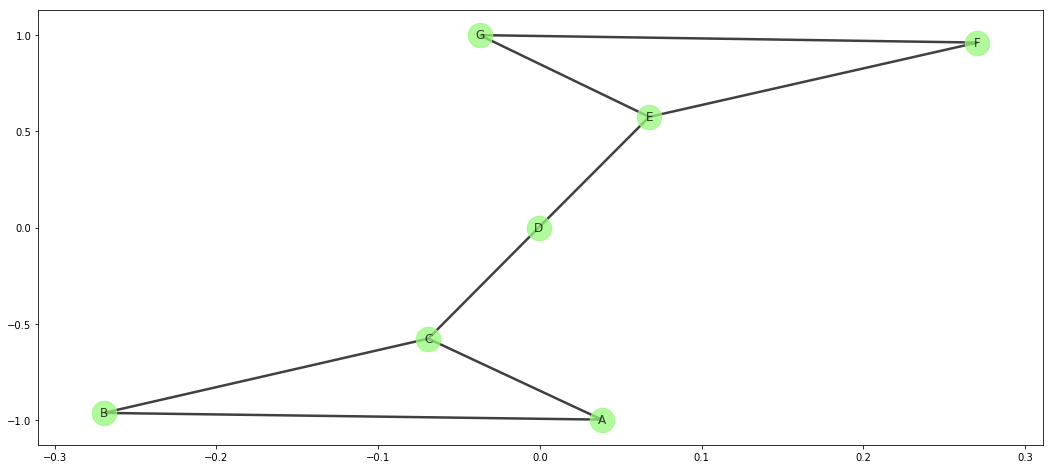

In [24]:

import matplotlib.pyplot as plt
%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(betweenness_graph, node_color='xkcd:light green',
                 alpha=.75, width=2.5, node_size=600)

In [25]:

betweenness_centrality = nx.betweenness_centrality(betweenness_graph, normalized=False, endpoints=False)
for node in node_list:
    print(node, betweenness_centrality[node])

A 0.0
B 0.0
C 8.0
D 9.0
E 8.0
F 0.0
G 0.0



For the same network, what is the normalized betweenness centrality (excluding endpoints) of node D?

In [26]:

nx.betweenness_centrality(betweenness_graph, normalized=True, endpoints=False)['D']

0.6

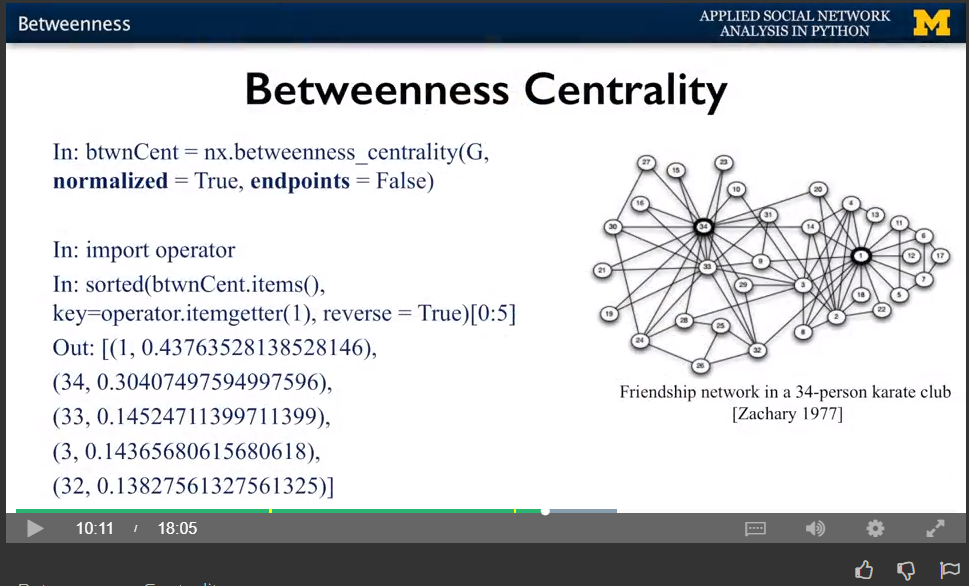

In [27]:

from IPython.display import Image

Image('../../saves/png/betweenness_centrality_karate_club.png')

In [47]:

import operator
%pprint

bc_dict = nx.betweenness_centrality(karate_club_graph, normalized=True, endpoints=False)
sorted(bc_dict.items(), key=operator.itemgetter(1), reverse=True)[0:5]

Pretty printing has been turned OFF


[(1, 0.43763528138528146), (34, 0.30407497594997596), (33, 0.145247113997114), (3, 0.14365680615680618), (32, 0.13827561327561325)]

In [31]:

import operator
%pprint

bc_approx = nx.betweenness_centrality(karate_club_graph,
                                      normalized=True, endpoints=False,
                                      k=10)
sorted(bc_approx.items(), key=operator.itemgetter(1),
       reverse=True)[0:5]

Pretty printing has been turned OFF


[(1, 0.49403950216450215), (34, 0.33547964766714766), (33, 0.1671329365079365), (3, 0.1635350529100529), (32, 0.10683261183261182)]

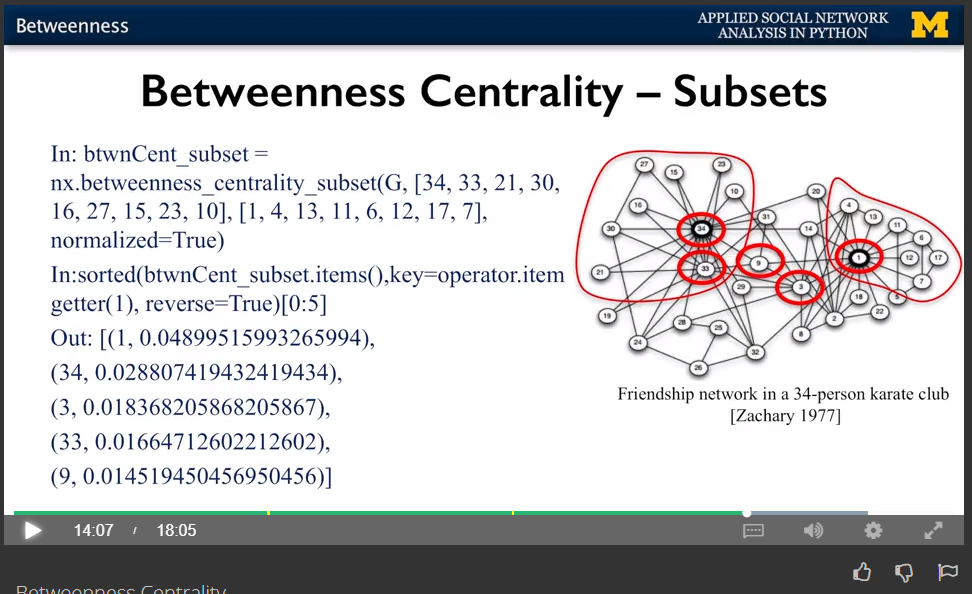

In [37]:

from IPython.display import Image

Image('../../saves/png/betweenness_centrality_subsets.png')

In [36]:

import operator
%pprint

source_list = [34, 33, 21, 30, 16, 27, 15, 23, 10]
target_list = [1, 4, 13, 11, 6, 12, 17, 7]
bcs_dict = nx.betweenness_centrality_subset(karate_club_graph, 
                                            sources=source_list, 
                                            targets=target_list, 
                                            normalized=True)
sorted(bcs_dict.items(), key=operator.itemgetter(1),
       reverse=True)[0:5]

Pretty printing has been turned OFF


[(1, 0.04899515993265994), (34, 0.028807419432419434), (3, 0.018368205868205867), (33, 0.01664712602212602), (9, 0.014519450456950456)]

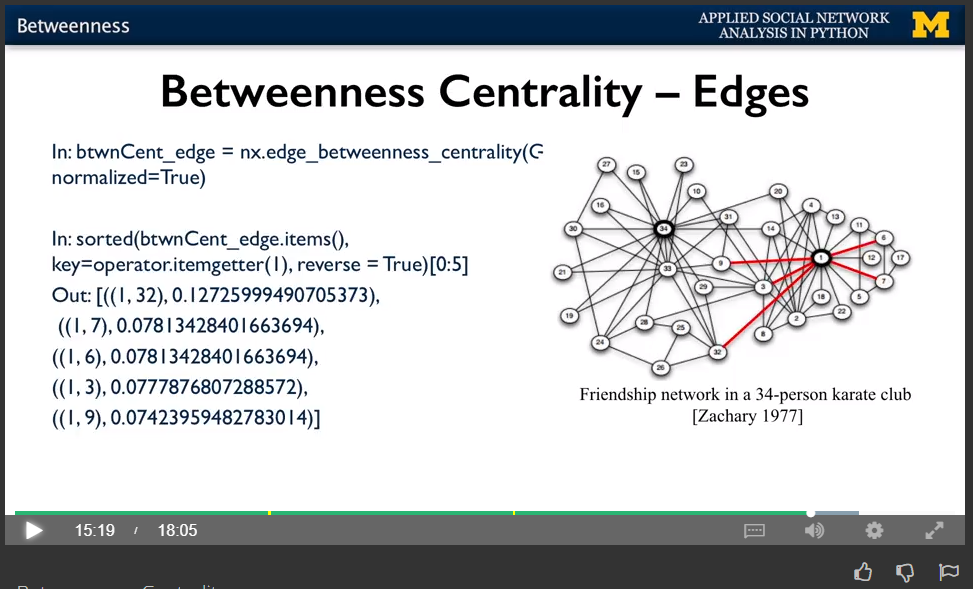

In [38]:

from IPython.display import Image

Image('../../saves/png/betweenness_centrality_edges.png')

In [40]:

# Betweenness centrality of an edge e is the sum of the
# fraction of all-pairs shortest paths that pass through e
ebc_dict = nx.edge_betweenness_centrality(karate_club_graph, normalized=True)
sorted(ebc_dict.items(), key=operator.itemgetter(1),
       reverse=True)[0:5]

[((1, 32), 0.1272599949070537), ((1, 7), 0.07813428401663695), ((1, 6), 0.07813428401663694), ((1, 3), 0.0777876807288572), ((1, 9), 0.07423959482783014)]

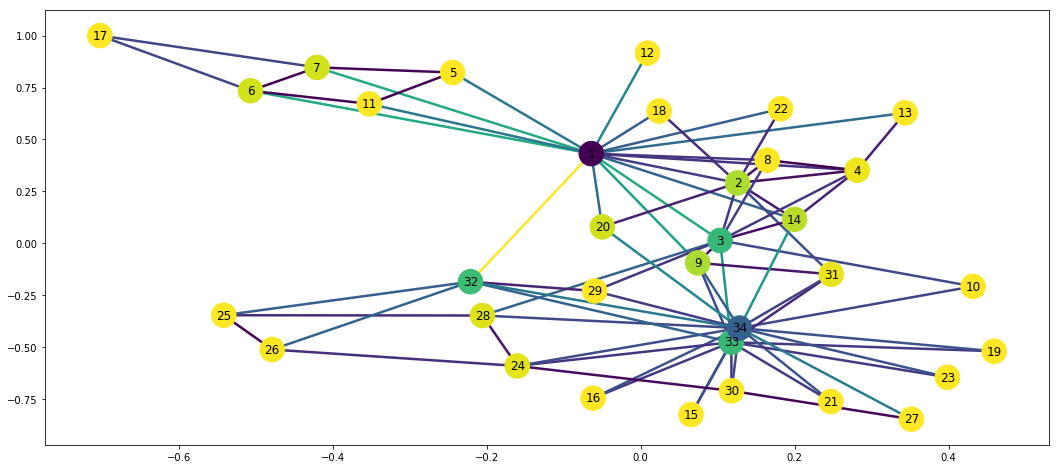

In [68]:

import matplotlib.pyplot as plt
%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
pos_dict = nx.spring_layout(karate_club_graph)
font_color_list = node_color_list[::-1]
label_dict = nx.draw_networkx_labels(karate_club_graph, pos=pos_dict, font_size=12,
                                     color=font_color_list)
edge_list = karate_club_graph.edges()
edge_color_list = [ebc_dict[edge] for edge in edge_list]
line_collection = nx.draw_networkx_edges(karate_club_graph, pos=pos_dict, width=2.5,
                                         edge_color=edge_color_list, cmap='viridis_r')
node_list = karate_club_graph.nodes()
node_color_list = [bc_dict[node] for node in node_list]
path_collection = nx.draw_networkx_nodes(karate_club_graph, pos=pos_dict, nodelist=node_list,
                                         node_size=600, node_color=node_color_list, cmap='viridis_r')

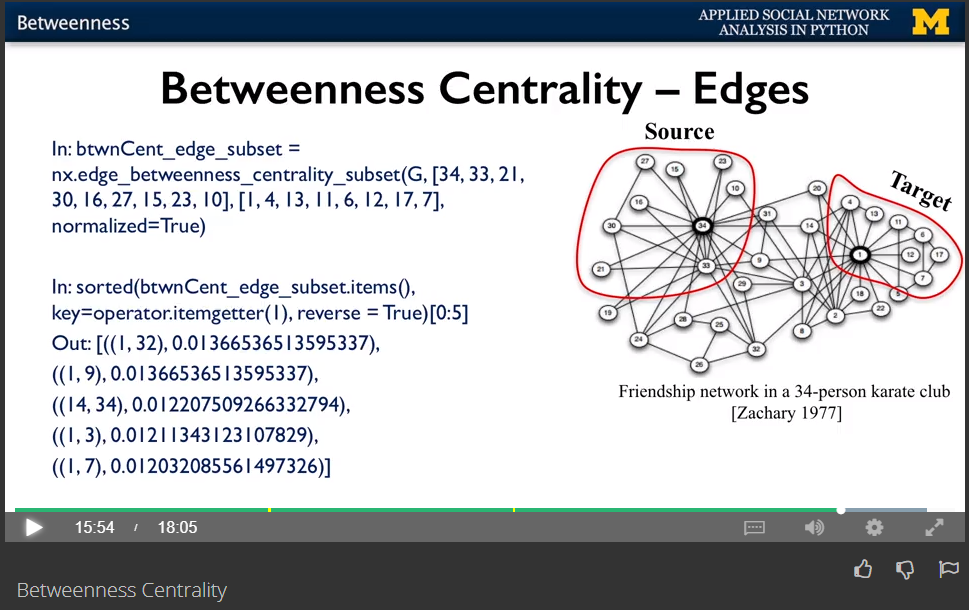

In [69]:

from IPython.display import Image

Image('../../saves/png/betweenness_centrality_edges_subsets.png')

In [70]:

import operator

source_list = [34, 33, 21, 30, 16, 27, 15, 23, 10]
target_list = [1, 4, 13, 11, 6, 12, 17, 7]
ebcs_dict = nx.edge_betweenness_centrality_subset(karate_club_graph,
                                                  sources=source_list,
                                                  targets=target_list,
                                                  normalized=True)
sorted(ebcs_dict.items(), key=operator.itemgetter(1),
       reverse=True)[0:5]

[((1, 9), 0.01366536513595337), ((1, 32), 0.01366536513595337), ((14, 34), 0.012207509266332794), ((1, 3), 0.01211343123107829), ((1, 6), 0.012032085561497326)]


# Basic Page Rank

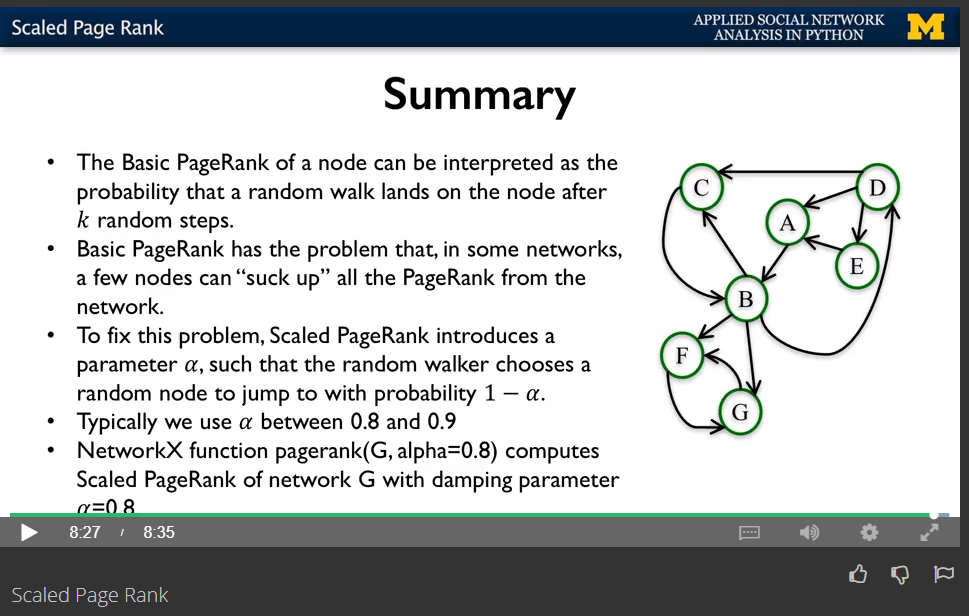

In [1]:

from IPython.display import Image

Image('../../saves/png/page_rank.png')

In [7]:

import networkx as nx

page_rank_graph = nx.DiGraph()
node_list = [chr(i) for i in range(65, 72)]
page_rank_graph.add_nodes_from(node_list)
page_rank_graph.add_edges_from([('A', 'B'), ('B', 'C'), ('B', 'D'), ('B', 'F'), ('B', 'G'), ('C', 'B'),
                                ('D', 'A'), ('D', 'C'), ('D', 'E'), ('E', 'A'), ('F', 'G'), ('G', 'F')])

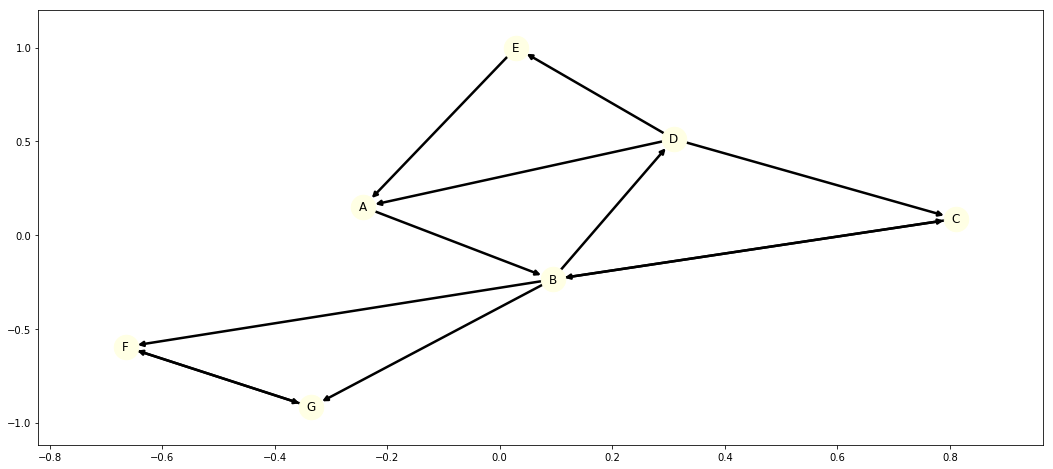

In [8]:

import matplotlib.pyplot as plt
%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(page_rank_graph, node_color='xkcd:off white',
                 width=2.5, node_size=600)

In [11]:

%pprint

nx.pagerank(page_rank_graph, alpha=0.8)

Pretty printing has been turned OFF


{'A': 0.0797510311959225, 'B': 0.15216425904765085, 'C': 0.07473913572031664, 'D': 0.05900450477059524, 'E': 0.044306059521149965, 'F': 0.29501750487218237, 'G': 0.2950175048721824}


# Hubs and Authorities

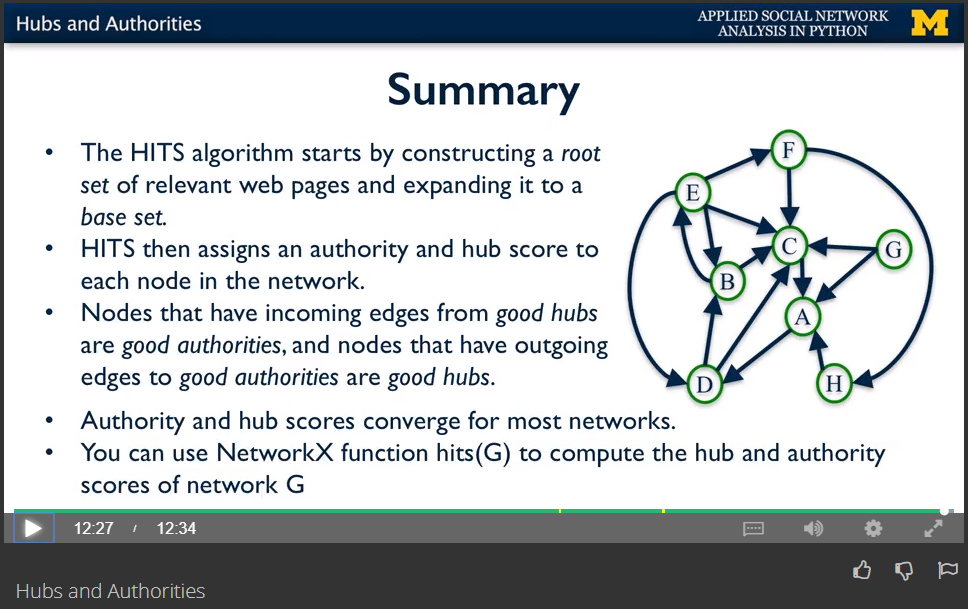

In [12]:

from IPython.display import Image

Image('../../saves/png/hits.png')

In [15]:

import networkx as nx

hits_graph = nx.DiGraph()
node_list = [chr(i) for i in range(65, 73)]
hits_graph.add_nodes_from(node_list)
hits_graph.add_edges_from([('A', 'D'), ('B', 'C'), ('B', 'E'), ('C', 'A'), ('D', 'B'), ('D', 'C'),
                           ('E', 'B'), ('E', 'C'), ('E', 'D'), ('E', 'F'), ('F', 'C'), ('F', 'H'),
                           ('G', 'A'), ('G', 'C'), ('H', 'A')])

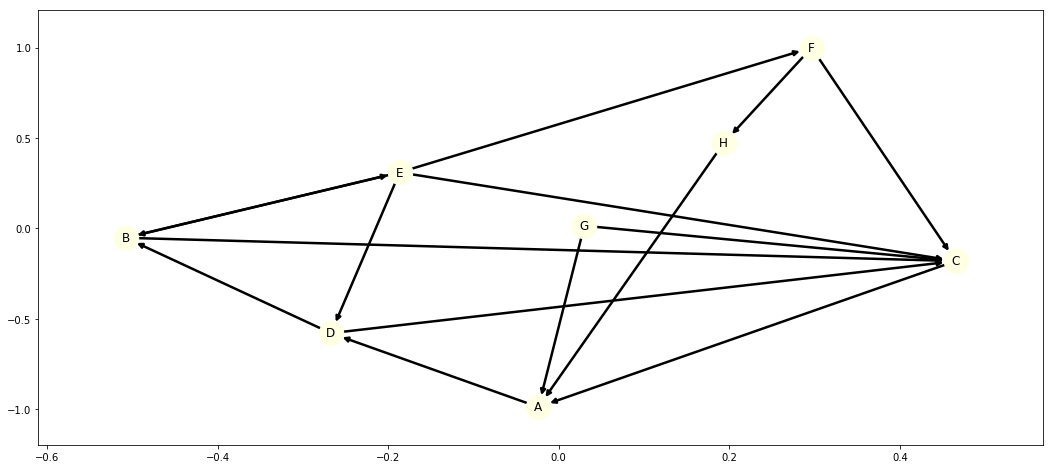

In [16]:

import matplotlib.pyplot as plt
%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(hits_graph, node_color='xkcd:off white',
                 width=2.5, node_size=600)

In [19]:

%pprint

nx.hits(page_rank_graph)

Pretty printing has been turned OFF


({'A': 6.426634829924115e-15, 'B': 0.4574605834896257, 'C': 6.426634829924115e-15, 'D': 0.2538714733692072, 'E': 0.06270107637358564, 'F': 0.11298343338378435, 'G': 0.11298343338378435}, {'A': 0.1099162657339696, 'B': 1.126602193449279e-14, 'C': 0.2469796040012721, 'D': 0.15883360295804577, 'E': 0.08814600104322631, 'F': 0.19806226313173753, 'G': 0.19806226313173753})


# Comparing Centrality Examples

In [37]:

import networkx as nx

centrality_examples_graph = nx.DiGraph()
node_list = list(range(1, 10))
centrality_examples_graph.add_nodes_from(node_list)
centrality_examples_graph.add_edges_from([(1, 2), (1, 5), (2, 1), (2, 3), (2, 4),
                                          (3, 1), (3, 2), (3, 4), (4, 1), (4, 3),
                                          (5, 1), (5, 6), (6, 5), (6, 7),
                                          (7, 6), (7, 8), (7, 9), (8, 6), (8, 7), (8, 9), (8, 6),
                                          (9, 6), (9, 8)])

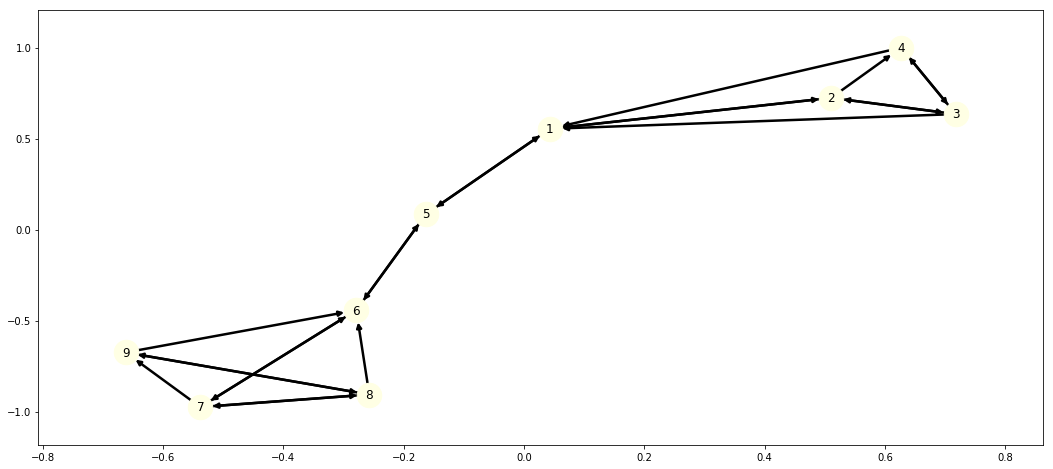

In [38]:

import matplotlib.pyplot as plt
%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(centrality_examples_graph, node_color='xkcd:off white',
                 width=2.5, node_size=600)

In [65]:

import networkx as nx
import operator

in_deg = dict(centrality_examples_graph.in_degree(centrality_examples_graph.nodes()))
print('In degree:', sorted(in_deg.items(), key=operator.itemgetter(1), reverse=True))
closeness = nx.closeness_centrality(centrality_examples_graph, u=None, wf_improved=True,
                                    reverse=True)
print('Closeness centrality:', sorted(closeness.items(), key=operator.itemgetter(1),
                                      reverse=True))
betweenness = nx.betweenness_centrality(centrality_examples_graph, normalized=False,
                                        endpoints=False)
print('Betweeness centrality:', sorted(betweenness.items(), key=operator.itemgetter(1),
                                       reverse=True))
page_rank = nx.pagerank(centrality_examples_graph, alpha=0.8)
print('PageRank:', sorted(page_rank.items(), key=operator.itemgetter(1), reverse=True))
auth = nx.hits(centrality_examples_graph)[1]
print('Authority:', sorted(auth.items(), key=operator.itemgetter(1), reverse=True))
hub = nx.hits(centrality_examples_graph)[0]
print('Hub:', sorted(hub.items(), key=operator.itemgetter(1), reverse=True))

In degree: [(1, 4), (6, 4), (2, 2), (3, 2), (4, 2), (5, 2), (7, 2), (8, 2), (9, 2)]
Closeness centrality: [(5, 0.4444444444444444), (1, 0.42105263157894735), (6, 0.42105263157894735), (2, 0.36363636363636365), (3, 0.36363636363636365), (7, 0.36363636363636365), (8, 0.36363636363636365), (4, 0.34782608695652173), (9, 0.34782608695652173)]
Betweeness centrality: [(5, 32.0), (1, 30.5), (6, 30.5), (2, 12.0), (7, 12.0), (3, 0.5), (8, 0.5), (4, 0.0), (9, 0.0)]
PageRank: [(1, 0.1624924244197534), (6, 0.1624924244197534), (5, 0.15221518761879843), (2, 0.10860933649370949), (7, 0.10860933649370949), (3, 0.08021505931151808), (8, 0.08021505931151808), (4, 0.07257558596561971), (9, 0.07257558596561971)]
Authority: [(1, 0.21121135254127466), (6, 0.21121135254127466), (4, 0.1107792643943093), (9, 0.1107792643943093), (3, 0.10043208814696536), (8, 0.10043208814696536), (2, 0.06528116009772789), (7, 0.06528116009772789), (5, 0.02459226963944558)]
Hub: [(2, 0.14848705085104583), (5, 0.1484870508510458

In [68]:

import networkx as nx

one_graph = nx.Graph()
node_list = [chr(i) for i in range(65, 71)]
one_graph.add_nodes_from(node_list)
one_graph.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'E'),
                          ('D', 'G'), ('E', 'G'), ('G', 'F')])

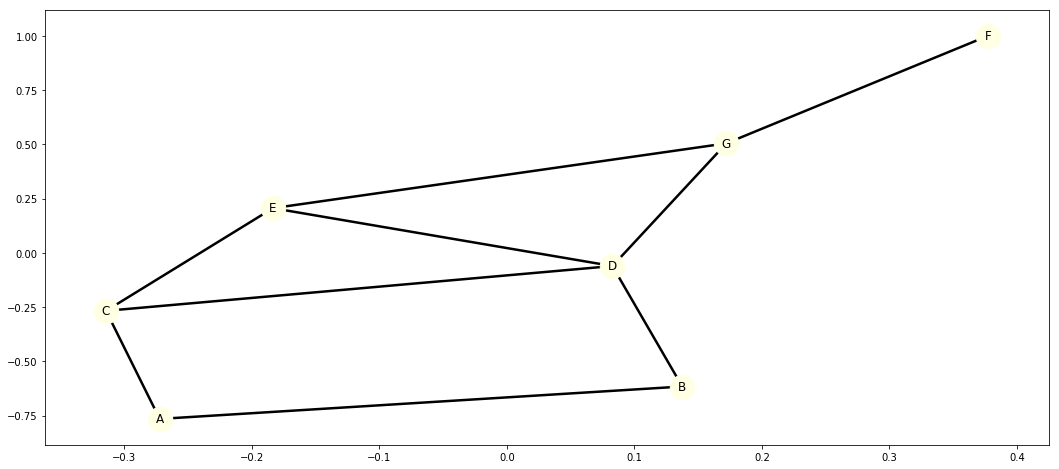

In [69]:

import matplotlib.pyplot as plt
%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(one_graph, node_color='xkcd:off white',
                 width=2.5, node_size=600)

In [71]:

nx.degree_centrality(one_graph)

{'A': 0.3333333333333333, 'B': 0.3333333333333333, 'C': 0.5, 'D': 0.6666666666666666, 'E': 0.5, 'F': 0.16666666666666666, 'G': 0.5}

In [73]:

nx.closeness_centrality(one_graph, u=None, distance=None, wf_improved=True, reverse=False)

{'A': 0.46153846153846156, 'B': 0.5454545454545454, 'C': 0.6, 'D': 0.75, 'E': 0.6666666666666666, 'F': 0.4, 'G': 0.6}

In [75]:

nx.betweenness_centrality(one_graph, k=None, normalized=True, weight=None, endpoints=False, seed=None)

{'A': 0.03333333333333333, 'B': 0.07777777777777777, 'C': 0.18888888888888888, 'D': 0.38888888888888884, 'E': 0.1111111111111111, 'F': 0.0, 'G': 0.3333333333333333}

In [77]:

ebc_dict = nx.edge_betweenness_centrality(one_graph, k=None, normalized=False, weight=None, seed=None)
sorted(ebc_dict.items(), key=operator.itemgetter(1), reverse=True)

[(('D', 'G'), 6.333333333333333), (('F', 'G'), 6.0), (('B', 'D'), 5.666666666666667), (('A', 'C'), 4.333333333333333), (('E', 'G'), 3.6666666666666665), (('C', 'D'), 3.666666666666666), (('C', 'E'), 3.666666666666666), (('A', 'B'), 2.666666666666666), (('D', 'E'), 2.0)]

In [80]:

import networkx as nx

seven_graph = nx.DiGraph()
node_list = [chr(i) for i in range(65, 69)]
seven_graph.add_nodes_from(node_list)
seven_graph.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'A'), ('C', 'D'), ('D', 'C')])

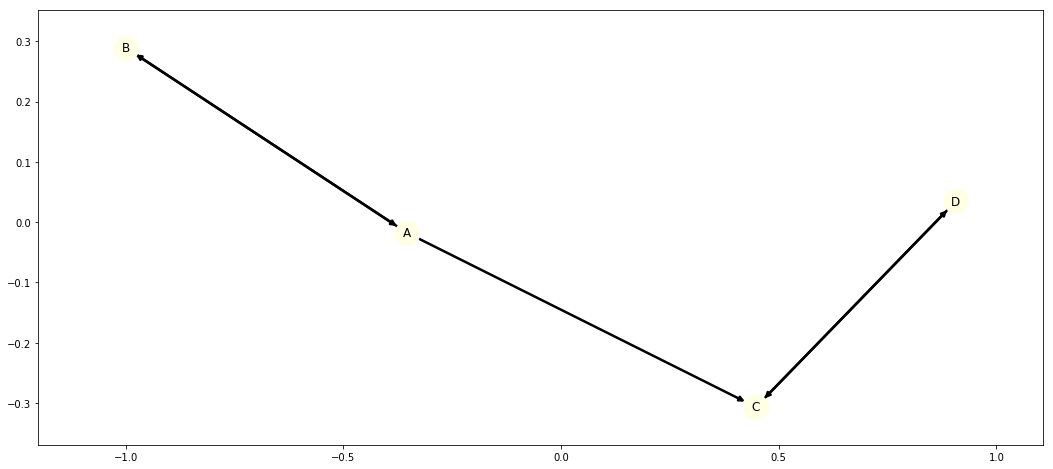

In [81]:

import matplotlib.pyplot as plt
%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(seven_graph, node_color='xkcd:off white',
                 width=2.5, node_size=600)

In [82]:

for i in [0.5, 0.95, 0.9, 0.8]:
    page_rank = nx.pagerank(seven_graph, alpha=i)
    print(str(i), str(page_rank['D']))

0.5 0.28571319580078125
0.95 0.4555778814326893
0.9 0.420166725100649
0.8 0.36764573423540375


In [84]:

import networkx as nx

eight_graph = nx.DiGraph()
node_list = [chr(i) for i in range(65, 69)]
eight_graph.add_nodes_from(node_list)
eight_graph.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'A'), ('D', 'C')])

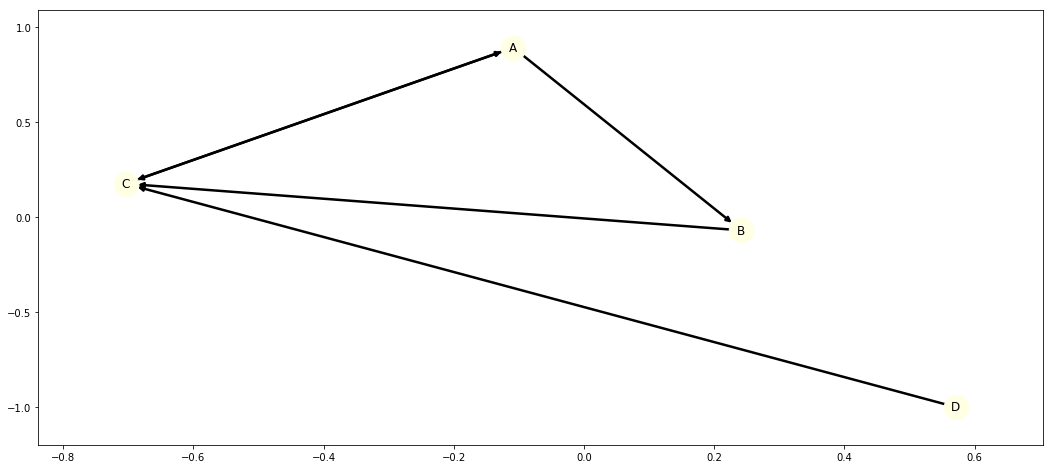

In [85]:

import matplotlib.pyplot as plt
%matplotlib inline

# Draw the graph using the kamada kawai layout
plt.figure(figsize=(18, 8))
nx.draw_networkx(eight_graph, node_color='xkcd:off white',
                 width=2.5, node_size=600)

In [90]:

import numpy as np

page_rank = nx.pagerank(eight_graph, alpha=1.0, max_iter=1, tol=np.inf)
page_rank['C']

0.625

In [92]:

nx.hits(eight_graph, max_iter=2, tol=np.inf, normalized=True)

({'A': 0.36363636363636365, 'B': 0.2727272727272727, 'C': 0.09090909090909091, 'D': 0.2727272727272727}, {'A': 0.2, 'B': 0.2, 'C': 0.6000000000000001, 'D': 0.0})

In [97]:

nx.pagerank(eight_graph, alpha=1.0, max_iter=2, tol=np.inf)

{'A': 0.25, 'B': 0.125, 'C': 0.625, 'D': 0.0}